# Анализ A/B-теста в интернет-магазине

#### Оглавление
* [Импорт библиотек](#first-bullet)
* [1. Открытие данных](#second-bullet)
* [2. Предобработка данных](#2-bullet)
* [3. Приоретизация гипотез](#3-bullet)
* [4. Исследовательский анализ данных](#4-bullet)    
* [ Общий вывод](#5-bullet)

#### Импорт библиотек <a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

from scipy import stats as st
import datetime as dt
import scipy.stats as stats

####  Открытие данных <a class="anchor" id="second-bullet"></a>

In [2]:
data_hypothesis=pd.read_csv('/datasets/hypothesis.csv')
display(data_hypothesis.head())
data_hypothesis.info()
data_hypothesis.duplicated().sum()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


0

In [3]:
orders=pd.read_csv('/datasets/orders.csv')
display(orders.head())
orders.info()
orders.duplicated().sum()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


0

In [4]:
visitors=pd.read_csv('/datasets/visitors.csv')
display(visitors.head())
visitors.info()
visitors.duplicated().sum()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


0

Просмотрели данные , пропусков и дубликатов нет, но необходимо пребразовать даты в соответствующий формат.

#### Преобразование данных <a class="anchor" id="2-bullet"></a>

In [5]:
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x, "%Y-%m-%d"))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [6]:
visitors['date']=visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные преобразованы , переходим к анализу

####  Приоритизация гипотез <a class="anchor" id="3-bullet"></a>

In [7]:
data_hypothesis['ICE']=((data_hypothesis['Impact']*data_hypothesis['Confidence'])/data_hypothesis['Efforts']).round()
display(data_hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.0


In [8]:
data_hypothesis['Rice']=(data_hypothesis['Reach']*data_hypothesis['Impact']*data_hypothesis['Confidence'])/data_hypothesis['Efforts']
display(data_hypothesis.sort_values(by='Rice', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,Rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.0,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.0,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.0,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


При подсчете ICE гипотез, приоретизация должна быть отдана 8,0 и 7 гипотезе, где показатель больше 10. 
Однако при подсчете Rice,  приоретизируемые гипотезы изменились на 7,2 и 0. Это произошло из-за того, что при расчете RICE используется параметр Reach(скольких пользователей затронет изменение). 8 гипотеза имеет высокий показатели Impact и Confidence и относительно низкую стоимость (Efforts),но поскольку по пораметру Reach всего 1 (изменение почти никого не затронет) при расчете ICE гипотеза была в лидерах приорететности, при расчете  Reach стала 5 по приоретету.

#### Иследовательский анализ данных <a class="anchor" id="4-bullet"></a>

In [9]:
datesGroups=orders[['date','group']].drop_duplicates()
orders_aggregated=datesGroups\
.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']== x['group'])]\
.agg( {'date':'max', 'group':'max','transactionId': 'nunique', 'visitorId' : 'nunique', 'revenue': 'sum'}), axis=1)\
.sort_values(by=['date','group'])

visitors_aggregated=datesGroups\
.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group']== x['group'])]\
.agg({'date':'max', 'group': 'max', 'visitors':'sum'}), axis=1)\
      .sort_values(by=['date','group'])


In [10]:
comulative_data=visitors_aggregated.merge(orders_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

display(comulative_data.head())

,date,group,visitors,transactionId,visitorId,revenue
0,2019-08-01,A,719,24,20,148579
1,2019-08-01,B,713,21,20,101217
2,2019-08-02,A,1338,44,38,242401
3,2019-08-02,B,1294,45,43,266748
4,2019-08-03,A,1845,68,62,354874


Подготовили таблицу для графиков

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


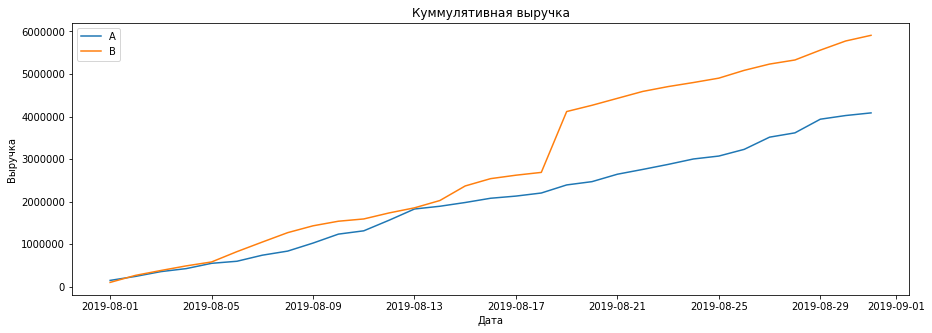

In [11]:
comulative_data_A=comulative_data[comulative_data['group']=='A']
comulative_data_B=comulative_data[comulative_data['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(comulative_data_A['date'],comulative_data_A['revenue'], label='A')
plt.plot(comulative_data_B['date'],comulative_data_B['revenue'], label='B')
plt.title('Куммулятивная выручка')
ax = plt.gca()
ax.set_xlabel('Дата')
ax.set_ylabel('Выручка')
plt.legend() 

По графику можно сказать, что у обоих групп выручка какое то время сохранялась на одном уровне. Потом после 17.08.19 выручка группы В сильно выросла . Скорее всего скзалось одна -несколько покупок пользователей из этой группы.

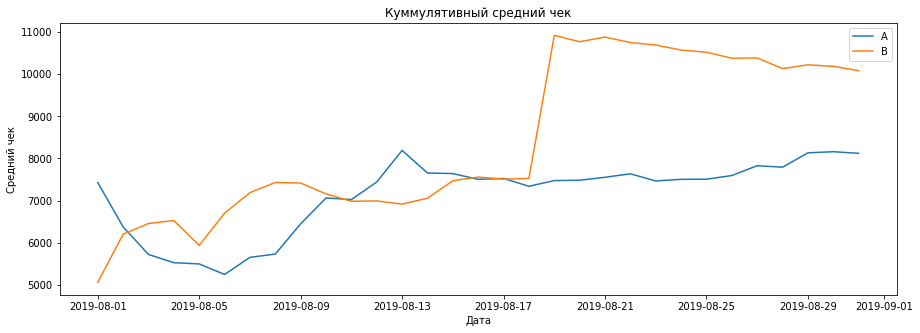

In [12]:
plt.figure(figsize=(15,5))
plt.plot(comulative_data_A['date'],comulative_data_A['revenue']/comulative_data_A['visitorId'], label='A')
plt.plot(comulative_data_B['date'],comulative_data_B['revenue']/comulative_data_B['visitorId'], label='B')
ax = plt.gca()
ax.set_xlabel('Дата')
ax.set_ylabel('Средний чек')
plt.title('Куммулятивный средний чек')
plt.legend() 

По среднему чеку можно сказать тоже самое . В начале теста значения колебались , но были на одном уровне. После 17.08.19 средний чек группы В сделал скачек и зафиксоровался на более высоком уровне. Сказались одна-несколько крупных покупок пользователей этой группы

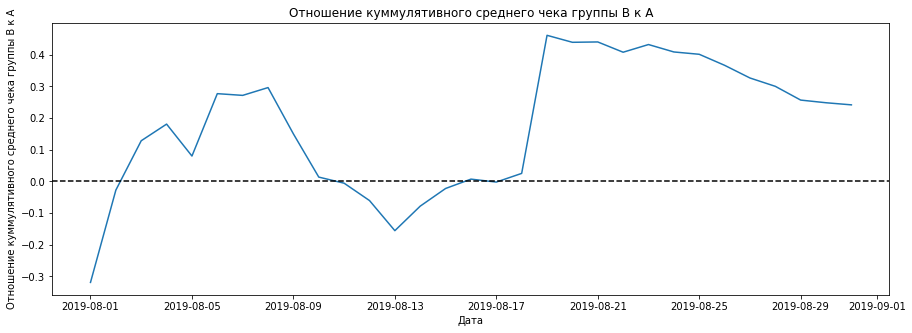

In [13]:
comulative_data_A_and_B=comulative_data_A.merge(comulative_data_B, left_on='date', right_on='date', suffixes=['A','B'])
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение куммулятивного среднего чека группы В к А')
plt.title('Отношение куммулятивного среднего чека группы В к А')
plt.plot(comulative_data_A_and_B['date'], (comulative_data_A_and_B['revenueB']/comulative_data_A_and_B['visitorIdB'])/(comulative_data_A_and_B['revenueA']/comulative_data_A_and_B['visitorIdA'])-1)

plt.axhline(y=0, color='black', linestyle='--') 

Значения колебаются , но в целом , средник чек группы В выше группы А

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Куммулятивная конверсия')

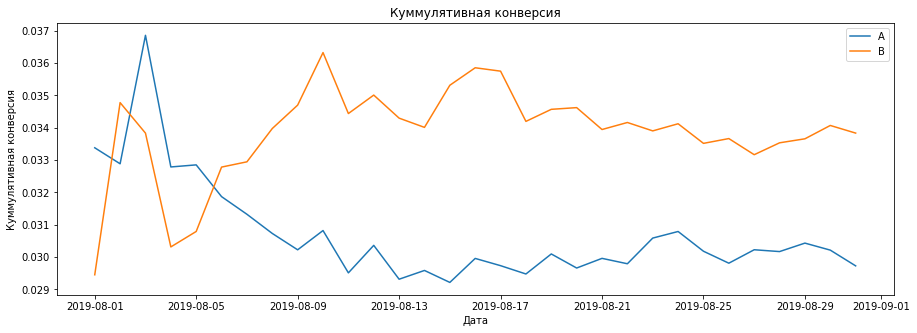

In [14]:
comulative_data_A['conversion']=comulative_data_A['transactionId']/comulative_data_A['visitors']
comulative_data_B['conversion']=comulative_data_B['transactionId']/comulative_data_B['visitors']
plt.figure(figsize=(15,5))
plt.plot(comulative_data_A['date'], comulative_data_A['conversion'], label='A')
plt.plot(comulative_data_B['date'], comulative_data_B['conversion'], label='B')
plt.legend()
ax = plt.gca()
ax.set_xlabel('Дата')
ax.set_ylabel('Куммулятивная конверсия')
plt.title('Куммулятивная конверсия')

Конверсия группы В стабильно выше группы А . Скорее всего гипотеза сработала и пользователи стали чаще делать заказы.

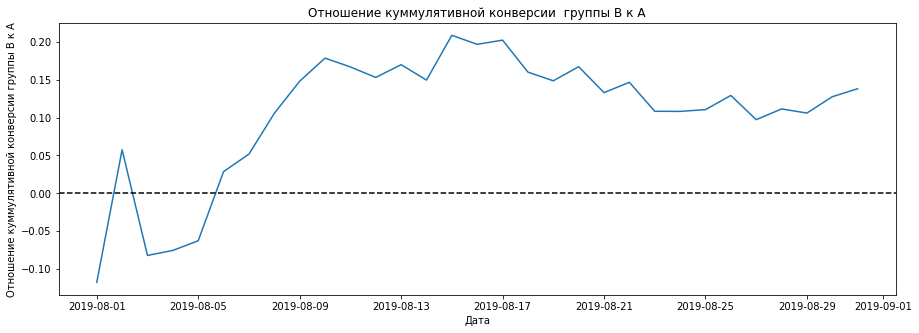

In [15]:
comulative_data_A_and_B_2=comulative_data_A.merge(comulative_data_B, left_on='date', right_on='date', how='left',  suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xlabel('Дата')
ax.set_ylabel('Отношение куммулятивной конверсии группы В к А')
plt.title('Отношение куммулятивной конверсии  группы В к А')
plt.plot(comulative_data_A_and_B_2['date'], comulative_data_A_and_B_2['conversionB']/comulative_data_A_and_B_2['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')

В начале отношение конверсий груп колебались из-за малого количества данных, после недели теста конверсия группы В была стабильно выше группы А. Если это не выбросы данных, тест сработал.

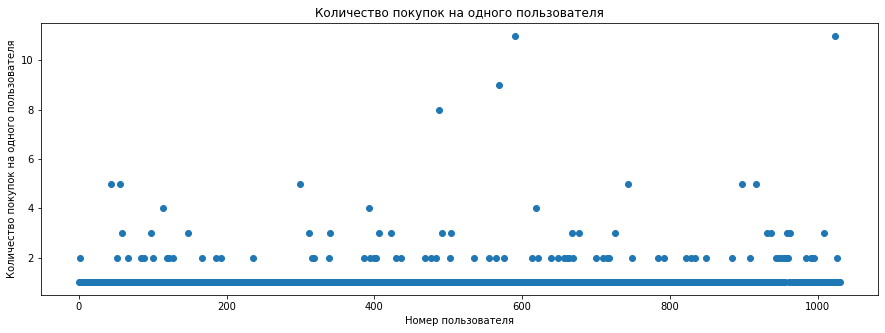

In [16]:
order_user=orders.drop(['date','revenue','group'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xlabel('Номер пользователя')
ax.set_ylabel('Количество покупок на одного пользователя')
plt.title('Количество покупок на одного пользователя')
x_values1 = pd.Series(range(0,len(order_user)))
plt.scatter(x_values1,order_user['transactionId']) 

По диагрраме чаще всего пользователи покупают всего один раз, больше 2 большая редкость. Посчитаем перцентили.

In [17]:
print(np.percentile(order_user['transactionId'], [95,99]))

[2. 4.]


Всего 5% пользователей, которые совершили больше 2 заказов и 1 процент пользователей совершивших больше 4.
За аномально активных клиентов возьмем пользователей совершивших более 4 заказов.

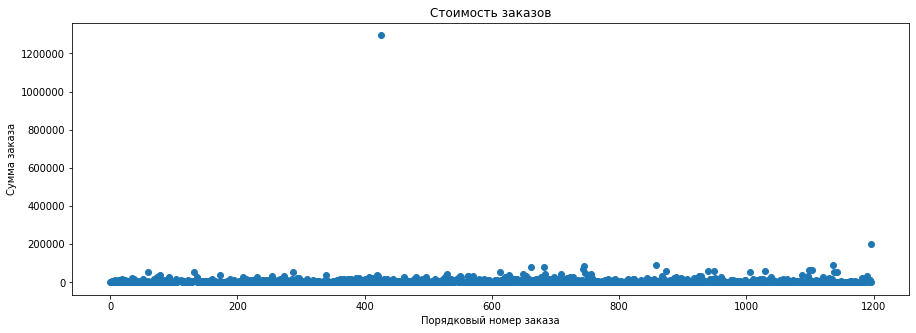

In [18]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
ax = plt.gca()
ax.set_xlabel('Порядковый номер заказа')
ax.set_ylabel('Сумма заказа')
plt.title('Стоимость заказов')
plt.scatter(x_values, orders['revenue']) 

Есть явный выброс данных. В большинстве случаев стоимость заказов меньше 50 тыс., но был один заказ превысивший по стоимости 1,2 млн. Скорее всего он попал в группу В, что вызвало рост выручки и среднего чека в этой группе.
Посчитаем перцентили

In [19]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


5% заказов превышают стоимость в 28 000 и 1% 58233,2. При очищении данных возьмем верхнюю границу в 58 233,2.

In [20]:
order_user_A=orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}).reset_index()
order_user_B=orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId':'nunique'}).reset_index()
visitors_A=visitors[visitors['group']=='A']['visitors'].sum()
visitors_B=visitors[visitors['group']=='B']['visitors'].sum()
print(visitors_A)
print(visitors_B)


18736
18916


Мы подготовили данные для проведения статистических тестов, также просмотрели количество визитов пользователей по каждой группе. Они почти равны.

Посчитаем статистическую значимость различий в конверсии между группами. Нулевая гипотеза: Конверсии равны. Альтернативная : Конверсии не равны. Статистическая погрешность равна 0,05.

In [21]:
null_count_A=pd.Series(0, index=np.arange(visitors_A - len(order_user_A['transactionId'])), name='transactionId')
sinpleA=pd.concat([order_user_A['transactionId'],null_count_A], axis=0)
null_count_B=pd.Series(0, index=np.arange(visitors_B - len(order_user_B['transactionId'])), name='transactionId')
sinpleB=pd.concat([order_user_B['transactionId'],null_count_B], axis=0)

In [22]:
alpha = .05 

print('{0:.3f}'.format(stats.mannwhitneyu(sinpleA,sinpleB)[1]))

if stats.mannwhitneyu(sinpleA,sinpleB)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


0.008
Отвергаем нулевую гипотезу


Можно сказать, что мы можем раздвинуть доверительный интервал на 0,8%, при условии что нулевая гипотеза у нас верна. Это очень мало, соответственно мы отвергаем нулевую гипотезу

In [23]:
print("{0:.3f}".format(sinpleB.mean()/sinpleA.mean()-1)) 

0.138


Средняя конверсия группы В выше на 13,8% , чем у группы А. Пользователи из группы В чаще совершают покупки, скорее всего гипотеза работает.

Следующиим этапом мы посчитаем статистическую значимость различий средних чеков.
Нулевая гипотеза : средние чеки в обеих группах равны. Альтернативная: средние чеки различны.

In [24]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


0.365
Не получилось отвергнуть нулевую гипотезу
0.259


p-value больше 36%, это слишком большая величина поэтому мы не можем отвергнуть нулевую гипотезу. При этом средний чек группы В выше группы А на 25%. Думаю сказались та большая покупка , превышающая 1,2 млн. Лучше посмотреть очищенные данные.

Для очищения данных я использовала значения вычесленных перцентилей. 1 % пользователей делает больше 4 заказов и 1 % делает заказ превышающий стоимость 58 233р. Посмотрим, на метрики по очищенным данным.

In [25]:
big_orders=pd.concat([order_user_A[order_user_A['transactionId']>4]['visitorId'],order_user_B[order_user_B['transactionId']>4]['visitorId']], axis=0)
big_orders_revenue=orders[orders['revenue']>58233]['visitorId']
big_orders_revenue_end=pd.concat([big_orders,big_orders_revenue], axis=0).drop_duplicates()
print(big_orders_revenue_end)

227     2038680547
278     2458001652
499     4256040402
326     2378935119
425     1920142716
662     4266935830
743     4133034833
744      888512513
858     1316129916
940     4003628586
949      887908475
1099     148427295
1103    1164614297
1136    1307669133
1196    2108080724
Name: visitorId, dtype: int64


Выделили пользователей, в которых количество и суммы заказов превышают установленную нами норму.

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [26]:
sampleAFiltered = pd.concat([order_user_A[np.logical_not(order_user_A['visitorId'].isin(big_orders_revenue_end))]['transactionId'],null_count_A], axis=0)
sampleBFiltered = pd.concat([order_user_B[np.logical_not(order_user_B['visitorId'].isin(big_orders_revenue_end))]['transactionId'],null_count_B], axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))


if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
Отвергаем нулевую гипотезу
0.153


Результаты почти не изменились. Конверсии двух групп не равны и показатели группы В явно выше группы А. 
Гипотеза сработала и пользователи группы В стали покупать чаще


In [27]:
sampleAFiltered_revenue = orders[np.logical_and(np.logical_not(orders['visitorId'].isin(big_orders_revenue_end)), orders['group']=='A')]['revenue']
sampleBFiltered_revenue = orders[np.logical_and(np.logical_not(orders['visitorId'].isin(big_orders_revenue_end)), orders['group']=='B')]['revenue']
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered_revenue, sampleBFiltered_revenue)[1]))

if stats.mannwhitneyu(sampleAFiltered_revenue, sampleBFiltered_revenue)[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print("{0:.3f}".format(sampleAFiltered_revenue.mean()/sampleBFiltered_revenue.mean()-1))

0.425
Не получилось отвергнуть нулевую гипотезу
0.006


После повторной провеки разности средних чеков  данные изменились. p-value  еще больше увеличилась и вывод остается тем же: нулевую гипотезу мы не можем отвергнуть. Однако изменилось и отношение средних чеков группы В к А . Средний чек группы В выше группы А меньше , чем на один процент

 #### Общий вывод <a class="anchor" id="5-bullet"></a>

Исходя из вышесказанного можно сделать вывод , что конверсия группы В выше. Это видно и по графику куммулятивной конверсии и по статистическому тесту. Средняя конверсия группы В выше группы А на 15% ( по очищенным данным), однако средние чеки обоих групп остались на одном уровне ( по очищенным данным). Соответственно пользователи группы В стали покупать чаще , но делают они покупки по стоимости на одном уровне с группой А.
Гипотеза сработала и можно присвоить победу группе В, тест можно не продолжать